# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [ ]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr




### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('data/retailmax.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

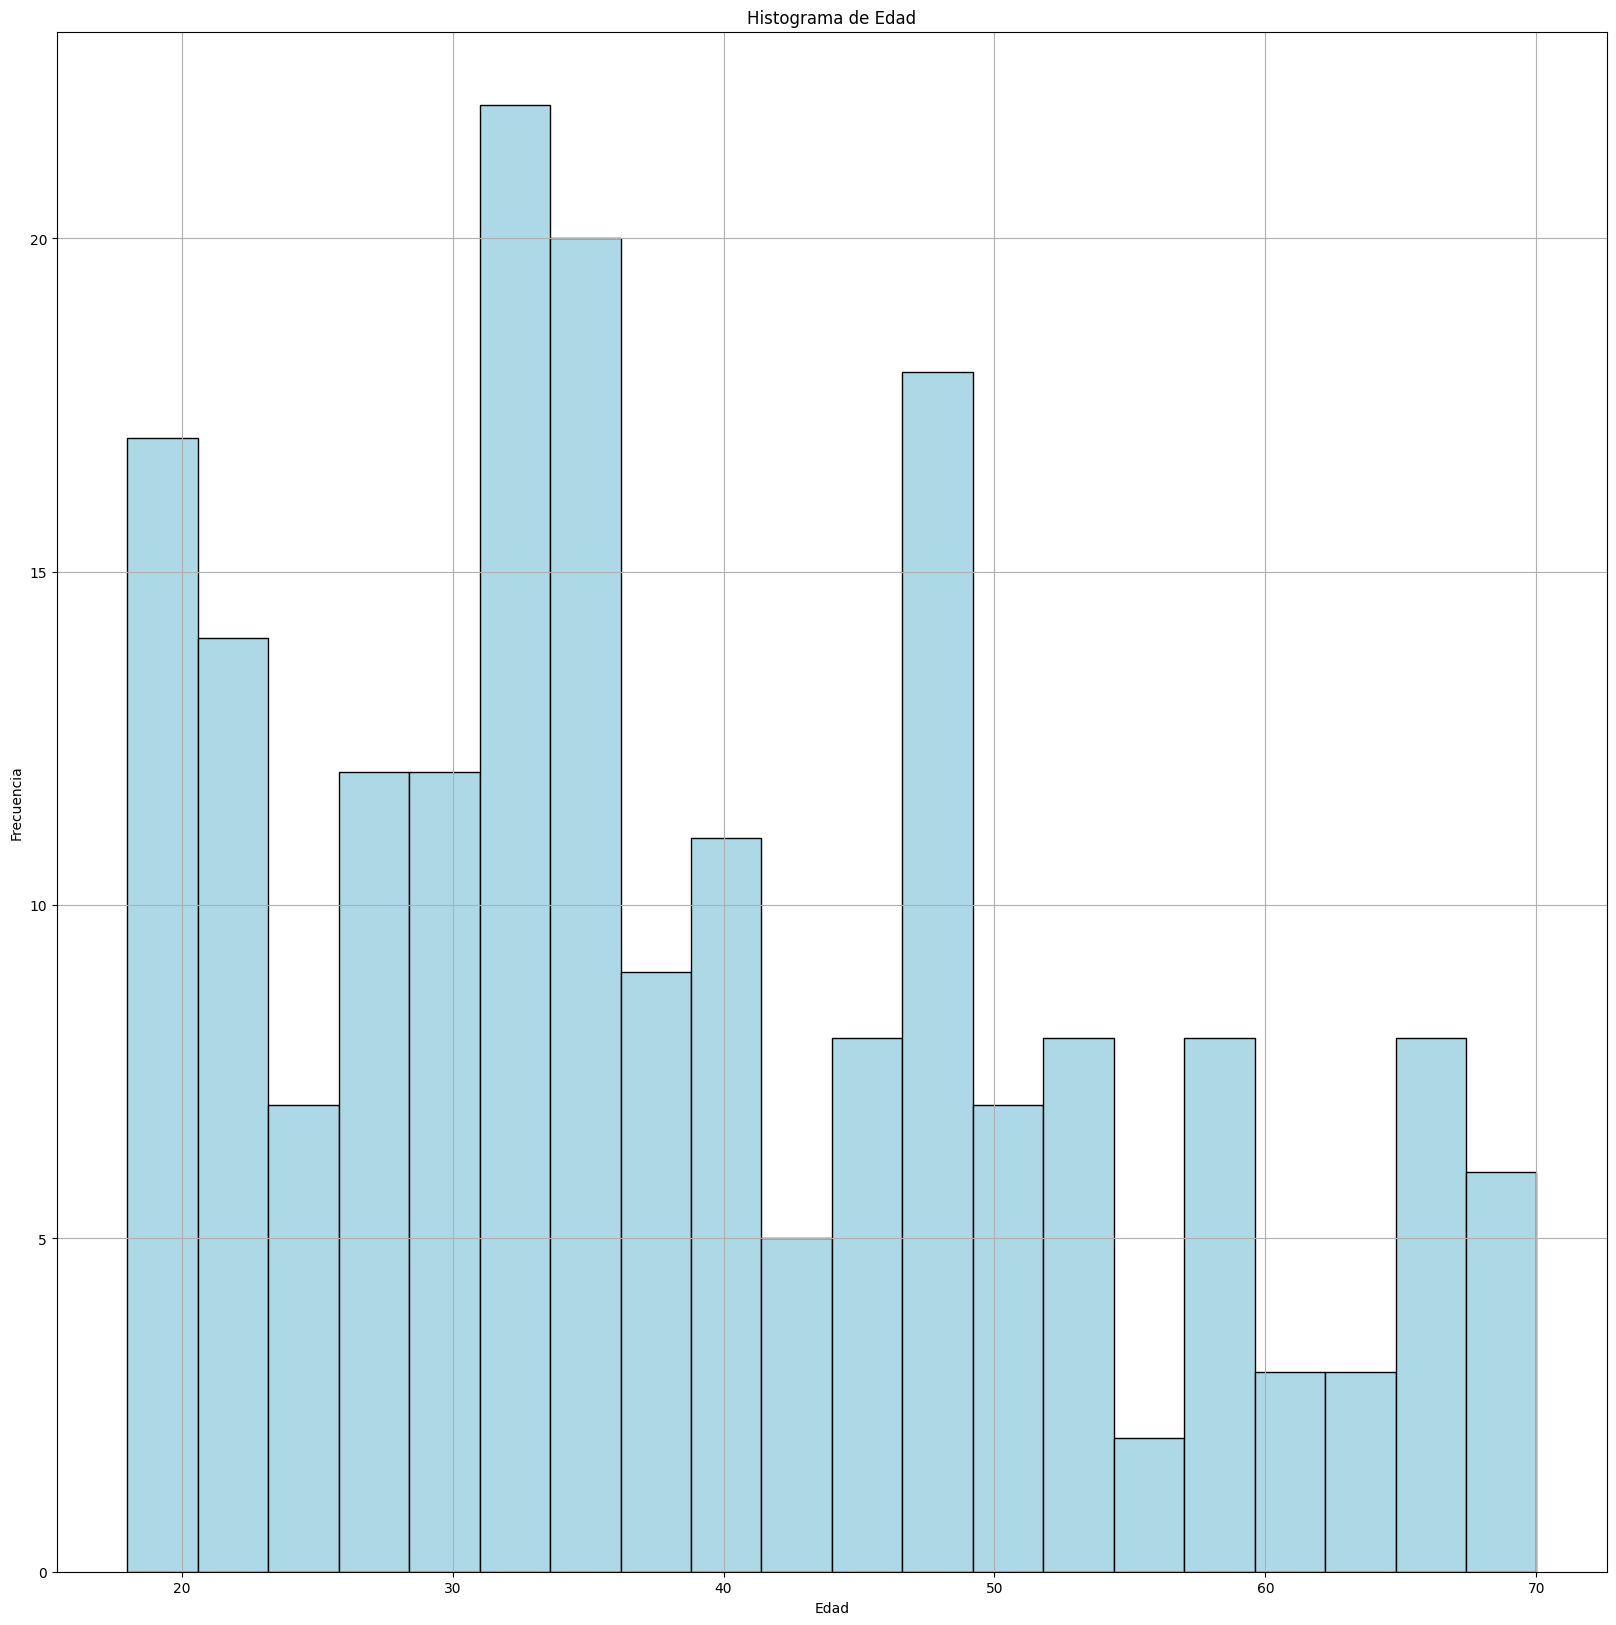

In [6]:
Histograma = df.hist(figsize=(20, 20), bins=20, column= "Age", color="lightblue", edgecolor="black")
title = Histograma[0][0].set_title("Histograma de Edad")
subtitle = Histograma[0][0].set_xlabel("Edad")
subtitle = Histograma[0][0].set_ylabel("Frecuencia")
plt.show()

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='str')

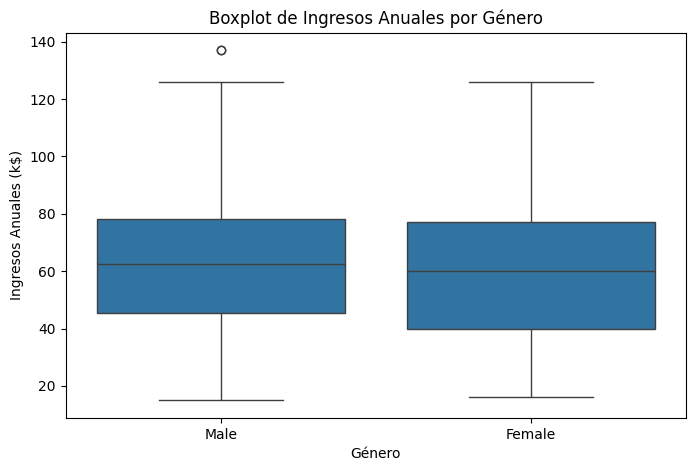

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Boxplot de Ingresos Anuales por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Anuales (k$)')
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

In [17]:
df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

<Axes: xlabel='Spending Score (1-100)', ylabel='grupos'>

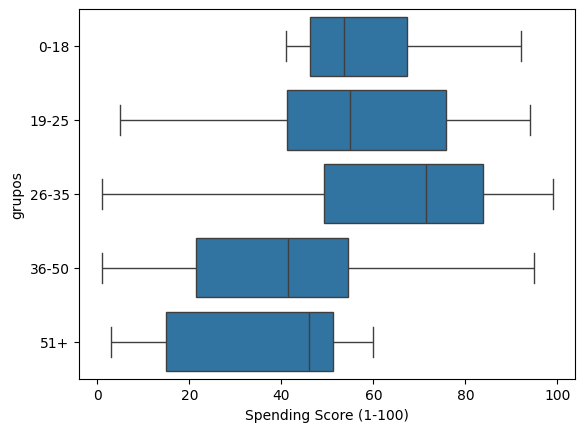

In [19]:
grupos_edad = pd.cut(df['Age'], bins=[0,18,25,35,50,70], labels=['0-18', '19-25', '26-35', '36-50', '51+'])
df['grupos'] = grupos_edad
sns.boxplot(x='Spending Score (1-100)', y='grupos', data=df)

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?

- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

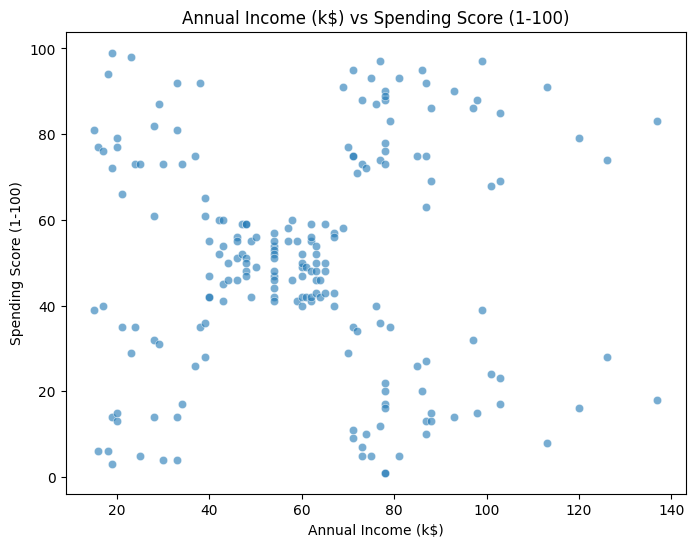

Coeficiente de correlación de Pearson r = 0.010, p-value = 8.893e-01


In [28]:

# Seleccionar columnas (asegúrate de que los nombres coincidan exactamente)
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']

# Eliminar filas con NaN en cualquiera de las dos columnas
mask = x.notna() & y.notna()
x = x[mask]
y = y[mask]

# Gráfica de dispersión sin línea de regresión
plt.figure(figsize=(8,6))
sns.scatterplot(x=x, y=y, alpha=0.6)
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Cálculo del coeficiente de correlación de Pearson y p-value
r, p = pearsonr(x, y)
print(f'Coeficiente de correlación de Pearson r = {r:.3f}, p-value = {p:.3e}')

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

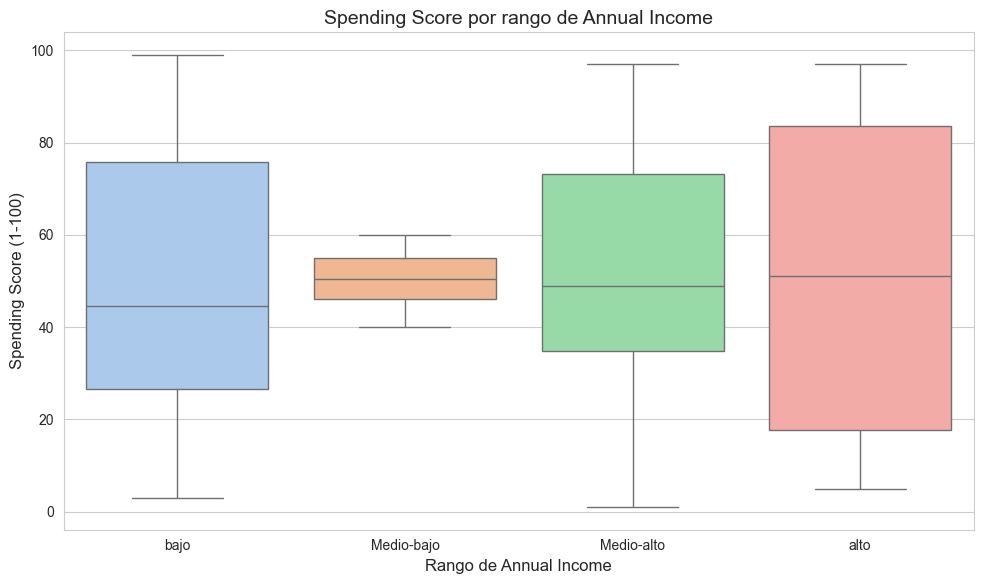

In [30]:

# Preparar datos
df_plot = df.copy()
df_plot = df_plot[df_plot['Annual Income (k$)'].notna() & df_plot['Spending Score (1-100)'].notna()]
df_plot['IncomeGroup'] = pd.qcut(df_plot['Annual Income (k$)'], q=4, labels=['bajo','Medio-bajo','Medio-alto','alto'])

# Estética
sns.set_style('whitegrid')
plt.rcParams.update({'font.size':12, 'axes.titlesize':14, 'axes.labelsize':12, 'xtick.labelsize':10, 'ytick.labelsize':10})
palette = sns.color_palette("pastel")

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='IncomeGroup', y='Spending Score (1-100)', data=df_plot, palette=palette)
plt.title('Spending Score por rango de Annual Income')
plt.xlabel('Rango de Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.tight_layout()
plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

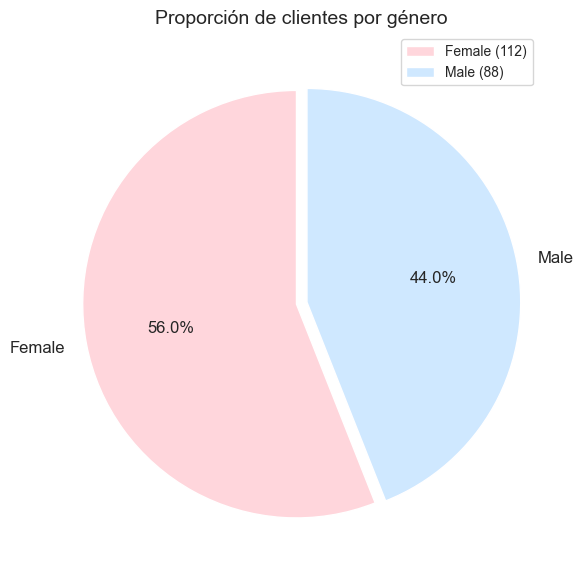

In [ ]:

# Conteo por género (ignora NaN)
counts = df['Gender'].dropna().value_counts()
labels = counts.index.tolist()
sizes = counts.values

# Colores suaves y explode para la porción mayor
colors = ['#ffd6dc', '#cfe8ff', '#e7f7e7', '#fff4d6']
explode = [0.05 if s == sizes.max() else 0 for s in sizes]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(labels)],
    explode=explode,
    textprops={'fontsize':12}
)
plt.title('Proporción de clientes por género', fontsize=14)
plt.legend([f'{l} ({n})' for l, n in zip(labels, sizes)], loc='best', fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

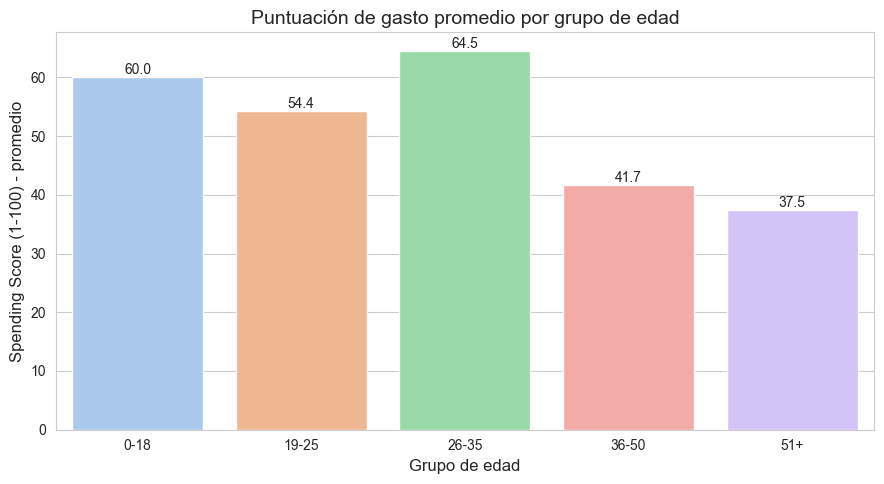

In [32]:

# Crear grupos de edad 
bins = [0,18,25,35,50,70]
labels = ['0-18','19-25','26-35','36-50','51+']
df_plot = df[df['Age'].notna() & df['Spending Score (1-100)'].notna()].copy()
df_plot['AgeGroup'] = pd.cut(df_plot['Age'], bins=bins, labels=labels, right=True)

# Calcular media de Spending Score por grupo
means = df_plot.groupby('AgeGroup')['Spending Score (1-100)'].mean().reset_index()

# Plot
sns.set_style('whitegrid')
plt.figure(figsize=(9,5))
palette = sns.color_palette("pastel")
ax = sns.barplot(x='AgeGroup', y='Spending Score (1-100)', data=means, palette=palette)
ax.set_title('Puntuación de gasto promedio por grupo de edad', fontsize=14)
ax.set_xlabel('Grupo de edad', fontsize=12)
ax.set_ylabel('Spending Score (1-100) - promedio', fontsize=12)

# Anotar valores sobre las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

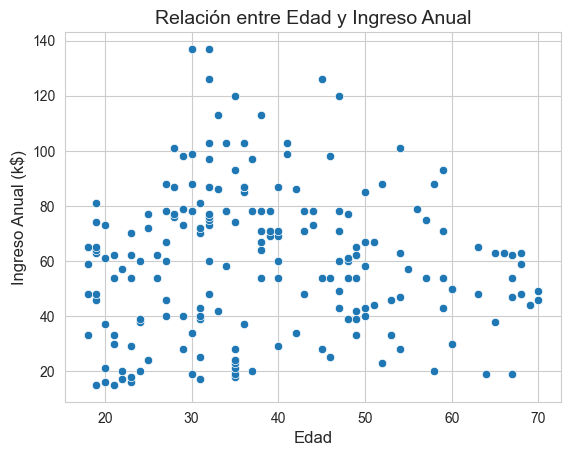

In [38]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Relación entre Edad y Ingreso Anual')        
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.show()

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

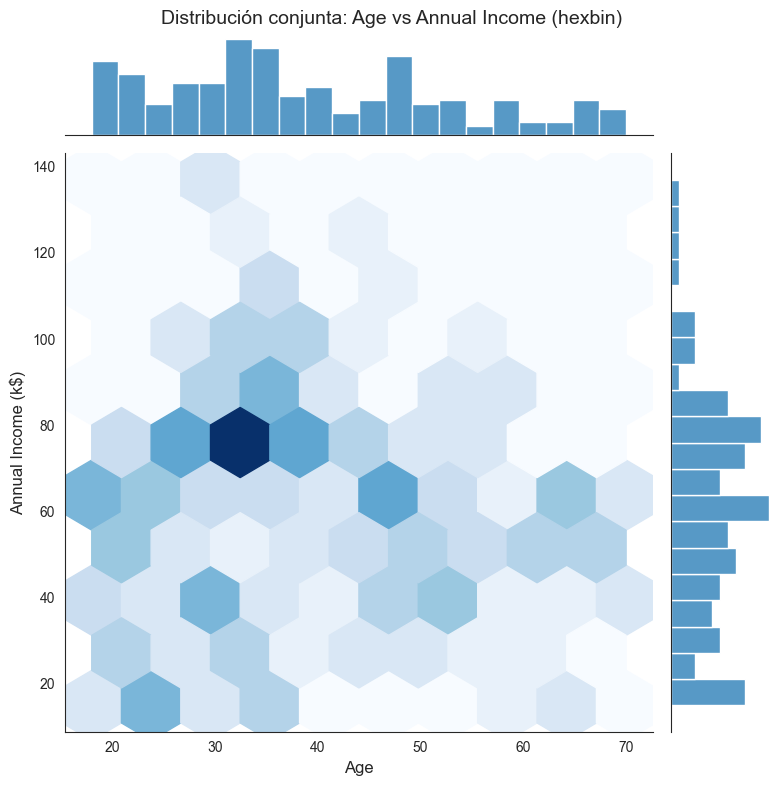

In [41]:

df_plot = df.copy()
df_plot['Age'] = pd.to_numeric(df_plot['Age'], errors='coerce')
df_plot['Annual Income (k$)'] = pd.to_numeric(df_plot['Annual Income (k$)'], errors='coerce')
df_plot = df_plot.dropna(subset=['Age','Annual Income (k$)'])

sns.set_style('white')
g = sns.jointplot(
    data=df_plot,
    x='Age',
    y='Annual Income (k$)',
    kind='hex',
    cmap='Blues',
    height=8,
    marginal_kws={'bins':20, 'fill':True}
)
g.ax_joint.set_xlabel('Age', fontsize=12)
g.ax_joint.set_ylabel('Annual Income (k$)', fontsize=12)
g.fig.suptitle('Distribución conjunta: Age vs Annual Income (hexbin)', fontsize=14)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

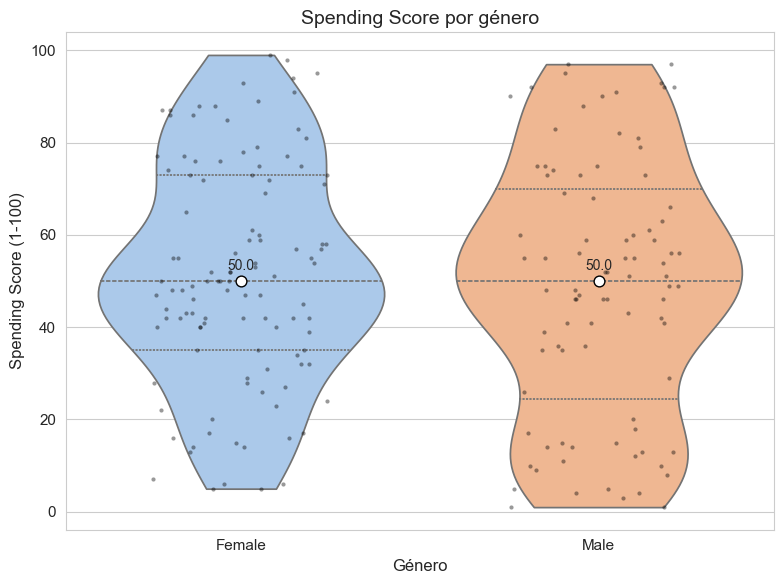

In [42]:
# Preparar datos
df_plot = df.copy()
df_plot['Spending Score (1-100)'] = pd.to_numeric(df_plot['Spending Score (1-100)'], errors='coerce')
df_plot['Gender'] = df_plot['Gender'].astype(str)
df_plot = df_plot.dropna(subset=['Gender', 'Spending Score (1-100)'])

# Ordenar géneros por frecuencia (opcional)
order = df_plot['Gender'].value_counts().index.tolist()

# Estética
sns.set_style('whitegrid')
plt.rcParams.update({'font.size':12, 'axes.titlesize':14, 'axes.labelsize':12, 'xtick.labelsize':11, 'ytick.labelsize':11})
palette = sns.color_palette("pastel")

# Violin + puntos (jitter) y mediana marcada
plt.figure(figsize=(8,6))
ax = sns.violinplot(
    x='Gender',
    y='Spending Score (1-100)',
    data=df_plot,
    order=order,
    palette=palette,
    inner='quartile',
    cut=0
)
sns.stripplot(
    x='Gender',
    y='Spending Score (1-100)',
    data=df_plot,
    order=order,
    color='k',
    size=3,
    jitter=0.25,
    alpha=0.4
)

# Medianas anotadas
medians = df_plot.groupby('Gender')['Spending Score (1-100)'].median()
for i, g in enumerate(order):
    m = medians.get(g, float('nan'))
    ax.scatter(i, m, color='white', edgecolor='black', zorder=3, s=60)
    ax.annotate(f'{m:.1f}', (i, m), textcoords="offset points", xytext=(0,8), ha='center', fontsize=10)

ax.set_title('Spending Score por género', fontsize=14)
ax.set_xlabel('Género', fontsize=12)
ax.set_ylabel('Spending Score (1-100)', fontsize=12)
plt.tight_layout()
plt.show()